<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Audit_RIsk_analysis_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [ ]:
df = pd.read_csv('DB_audit_risk.csv')

In [ ]:
print(df.shape)
print(df.head())

(776, 27)
   Sector_score LOCATION_ID  PARA_A  ...  Detection_Risk  Audit_Risk  Risk
0          3.89          23    4.18  ...             0.5      1.7148     1
1          3.89           6    0.00  ...             0.5      0.5108     0
2          3.89           6    0.51  ...             0.5      0.3096     0
3          3.89           6    0.00  ...             0.5      3.5060     1
4          3.89           6    0.00  ...             0.5      0.2832     0

[5 rows x 27 columns]


In [ ]:
col_names = df.columns

col_names

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
df[categorical].head()  # view the categorical variable

There are 1 categorical variables

The categorical variables are : ['LOCATION_ID']


,LOCATION_ID
0,23
1,6
2,6
3,6
4,6


In [ ]:
# check missing values in categorical variables

df[categorical].isnull().sum()

LOCATION_ID    0
dtype: int64

In [ ]:

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 26 numerical variables

The numerical variables are : ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk']


In [ ]:
# view the numerical variables

df[numerical].head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       Sector_score  PARA_A  Score_A  ...  Detection_Risk  Audit_Risk   Risk
count         776.0   776.0    776.0  ...           776.0       776.0  776.0
mean           20.0     2.0      0.0  ...             0.0         7.0    0.0
std            24.0     6.0      0.0  ...             0.0        39.0    0.0
min             2.0     0.0      0.0  ...             0.0         0.0    0.0
25%             2.0     0.0      0.0  ...             0.0         0.0    0.0
50%             4.0     1.0      0.0  ...             0.0         1.0    0.0
75%            56.0     2.0      1.0  ...             0.0         3.0    1.0
max            60.0    85.0      1.0  ...             0.0       962.0    1.0

[8 rows x 26 columns] 2


In [ ]:

IQR = df.Inherent_Risk.quantile(0.75) - df.Inherent_Risk.quantile(0.25)
Lower_fence = df.Inherent_Risk.quantile(0.25) - (IQR * 3)
Upper_fence = df.Inherent_Risk.quantile(0.75) + (IQR * 3)
print('Inherent_Risk outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Inherent_Risk outliers are values < -25.656499999999994 or > 37.903499999999994


In [ ]:

IQR = df.Audit_Risk.quantile(0.75) - df.Audit_Risk.quantile(0.25)
Lower_fence = df.Audit_Risk.quantile(0.25) - (IQR * 3)
Upper_fence = df.Audit_Risk.quantile(0.75) + (IQR * 3)
print('Audit_Risk outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Audit_Risk outliers are values < -8.4829 or > 12.049500000000002


In [ ]:
# find outliers for WindSpeed9am variable

IQR = df.Money_Value.quantile(0.75) - df.Money_Value.quantile(0.25)
Lower_fence = df.Money_Value.quantile(0.25) - (IQR * 3)
Upper_fence = df.Money_Value.quantile(0.75) + (IQR * 3)
print('Money_Value outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Money_Value outliers are values < -16.785000000000004 or > 22.380000000000003


In [ ]:
X = df.drop(['Risk', 'LOCATION_ID'], axis=1)

y = df['Risk']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((543, 25), (233, 25))

In [ ]:
# check data types in X_train

X_train.dtypes

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
dtype: object

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Sector_score',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB',
 'RiSk_E',
 'History',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'CONTROL_RISK',
 'Detection_Risk',
 'Audit_Risk']

In [ ]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Money_Value 0.0018


In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)     

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.00000000e+00, 0.00000000e+00, 9.99837213e-01, 9.99652607e-01,
       6.55672448e-06, 9.96780080e-01, 9.99711636e-01, 9.59552600e-01,
       9.99606620e-01, 9.99864927e-01, 0.00000000e+00, 0.00000000e+00,
       9.99711144e-01, 9.99869689e-01, 0.00000000e+00, 9.99768106e-01,
       9.99592871e-01, 5.20172275e-06, 5.12620721e-07, 2.14683785e-02,
       9.99848450e-01, 5.53534823e-02, 9.99880873e-01, 9.99868514e-01,
       0.00000000e+00, 9.99705277e-01, 0.00000000e+00, 9.99547588e-01,
       4.99133280e-02, 9.99596916e-01, 9.99891097e-01, 9.99376907e-01,
       9.99891097e-01, 0.00000000e+00, 9.76358980e-01, 9.99859448e-01,
       9.99891097e-01, 9.99773445e-01, 6.17880598e-01, 3.10862447e-15,
       9.99848450e-01, 0.00000000e+00, 1.29218388e-01, 1.57360973e-03,
       2.37190267e-11, 9.99811348e-01, 9.99874902e-01, 2.04927786e-09,
       9.99081015e-01, 0.00000000e+00, 0.00000000e+00, 9.99144898e-01,
       9.98962938e-01, 9.97828723e-01, 9.99529975e-01, 9.06230646e-12,
      

In [ ]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([1.00000000e+00, 1.00000000e+00, 1.62786936e-04, 3.47393174e-04,
       9.99993443e-01, 3.21991958e-03, 2.88364082e-04, 4.04473996e-02,
       3.93380245e-04, 1.35073139e-04, 1.00000000e+00, 1.00000000e+00,
       2.88856430e-04, 1.30311009e-04, 1.00000000e+00, 2.31893836e-04,
       4.07129347e-04, 9.99994798e-01, 9.99999487e-01, 9.78531622e-01,
       1.51550049e-04, 9.44646518e-01, 1.19127240e-04, 1.31485568e-04,
       1.00000000e+00, 2.94722538e-04, 1.00000000e+00, 4.52411949e-04,
       9.50086672e-01, 4.03083863e-04, 1.08903199e-04, 6.23093017e-04,
       1.08903199e-04, 1.00000000e+00, 2.36410202e-02, 1.40551841e-04,
       1.08903199e-04, 2.26555432e-04, 3.82119402e-01, 1.00000000e+00,
       1.51550049e-04, 1.00000000e+00, 8.70781612e-01, 9.98426390e-01,
       1.00000000e+00, 1.88652460e-04, 1.25098159e-04, 9.99999998e-01,
       9.18984755e-04, 1.00000000e+00, 1.00000000e+00, 8.55101766e-04,
       1.03706174e-03, 2.17127730e-03, 4.70024722e-04, 1.00000000e+00,
      

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9914


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9945


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.9945
Test set score: 0.9914


In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[144   1]
 [  1  87]]

True Positives(TP) =  144

True Negatives(TN) =  87

False Positives(FP) =  1

False Negatives(FN) =  1


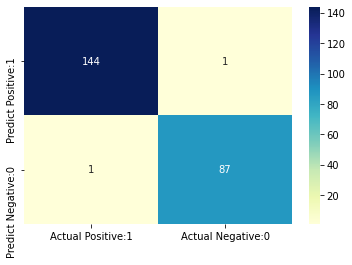

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')